## Setup environment

In [ ]:
# Mount GDrive
# from google.colab import drive
# drive.mount('/content/drive/')

# Move to the proper directory
# MAIN_PATH = ''
# % cd MAIN_PATH

# Check to see if present working directory is correct
# ! pwd

# unzip the data set
# ! unzip dataset.zip

# Add utils path
# import sys
# MY_UTILS_PATH = ''
# if not MY_UTILS_PATH in sys.path:
#     sys.path.append(MY_UTILS_PATH)

## Import libraries

In [1]:
%matplotlib inline

import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

import helpers


## Prepare and explore data

In [ ]:
# helpers.revise_fnames('dataset/train/image')
# helpers.revise_fnames('dataset/train/label')
# helpers.revise_fnames('dataset/test/label')
# helpers.revise_fnames('dataset/test/image')

In [3]:
INPUT_DIR = 'dataset/train/image/'
TARGET_DIR = 'dataset/train/label/'
TEST_INPUT_DIR = 'dataset/test/image/'
TEST_TARGET_DIR = 'dataset/test/label/'
IMG_SIZE = (480, 640)
N_CHANNELS = 4
BATCH_SIZE = 2
SEED = 909
CLASSES = {
    0: 'Background',
    1: 'Field',
    2: 'Lines',
    3: 'Ball',
    4: 'Robots',
    5 : 'Goals',
}


# GEN_PARAMS = {
#     'validation_split': 0.1,
#     'featurewise_center': True,
#     'featurewise_std_normalization': True,
#     'rotation_range': 90,
#     'width_shift_range': 0.1,
#     'height_shift_range': 0.1,
#     'zoom_range': 0.2
# }

# dev_input_datagen = tf.keras.preprocessing.image.ImageDataGenerator(**GEN_PARAMS)
# dev_target_datagen = tf.keras.preprocessing.image.ImageDataGenerator(**GEN_PARAMS)

# train_input_generator = dev_input_datagen.flow_from_directory(
#     INPUT_DIR,
#     target_size=IMG_SIZE,
#     class_mode=None,
#     subset='training',
#     batch_size=BATCH_SIZE,
#     color_mode='rgba',
#     seed=SEED,
#     shuffle=True,
# )
# train_target_generator = dev_target_datagen.flow_from_directory(
#     TARGET_DIR,
#     target_size=IMG_SIZE,
#     class_mode=None,
#     subset='training',
#     batch_size=BATCH_SIZE,
#     # color_mode='grayscale',
#     seed=SEED,
#     shuffle=True,
# )
# train_generator = zip(train_input_generator, train_target_generator)

# validation_input_generator = dev_input_datagen.flow_from_directory(
#     INPUT_DIR,
#     target_size=IMG_SIZE,
#     class_mode=None,
#     subset='validation',
#     batch_size=BATCH_SIZE,
#     color_mode='rgba',
#     seed=SEED,
#     shuffle=True
# )
# validation_target_generator = dev_target_datagen.flow_from_directory(
#     TARGET_DIR,
#     target_size=IMG_SIZE,
#     class_mode=None,
#     subset='validation',
#     batch_size=BATCH_SIZE,
#     # color_mode='grayscale',
#     seed=SEED,
#     shuffle=True
# )
# validation_generator = zip(validation_input_generator, validation_target_generator)



input_paths = sorted(
    [
        os.path.join(INPUT_DIR, fname)
        for fname in os.listdir(INPUT_DIR)
        if fname.endswith('.png')
    ]
)
print(f'Found {len(input_paths)} images.')

target_paths = sorted(
    [
        os.path.join(TARGET_DIR, fname)
        for fname in os.listdir(TARGET_DIR)
        if fname.endswith('.png')
    ]
)
print(f'Found {len(target_paths)} masks.')

if (len(input_paths) != len(target_paths)):
    raise Exception('dataset errror')

test_input_paths = sorted(
    [
        os.path.join(TEST_INPUT_DIR, fname)
        for fname in os.listdir(TEST_INPUT_DIR)
        if fname.endswith('.jpg')
    ]
)
print(f'Found {len(test_input_paths)} test images.')

test_target_paths = sorted(
    [
        os.path.join(TEST_TARGET_DIR, fname)
        for fname in os.listdir(TEST_TARGET_DIR)
        if fname.endswith('.png')
    ]
)
print(f'Found {len(test_target_paths)} test masks.')

num_classes = len(CLASSES)
print('Number of classes:', num_classes)

print('Paths: ')
for input_path, target_path in zip(input_paths[:5], target_paths[:5]):
    print(input_path, '|', target_path)


# Shuffle the data
indexes = np.arange(len(input_paths), dtype=int)
np.random.shuffle(indexes)

input_paths = [input_paths[i] for i in indexes]
target_paths = [target_paths[i] for i in indexes]

print('Paths after shuffle: ')

for input_path, target_path in zip(input_paths[:5], target_paths[:5]):
    print(input_path, '|', target_path)

Found 2317 images.
Found 2317 masks.
Found 100 test images.
Found 100 test masks.
Number of classes: 6
Paths: 
dataset/train/image/0001.png | dataset/train/label/0001.png
dataset/train/image/0002.png | dataset/train/label/0002.png
dataset/train/image/0003.png | dataset/train/label/0003.png
dataset/train/image/0004.png | dataset/train/label/0004.png
dataset/train/image/0005.png | dataset/train/label/0005.png
Paths after shuffle: 
dataset/train/image/1345.png | dataset/train/label/1345.png
dataset/train/image/0129.png | dataset/train/label/0129.png
dataset/train/image/0297.png | dataset/train/label/0297.png
dataset/train/image/0322.png | dataset/train/label/0322.png
dataset/train/image/2065.png | dataset/train/label/2065.png


## Display the data

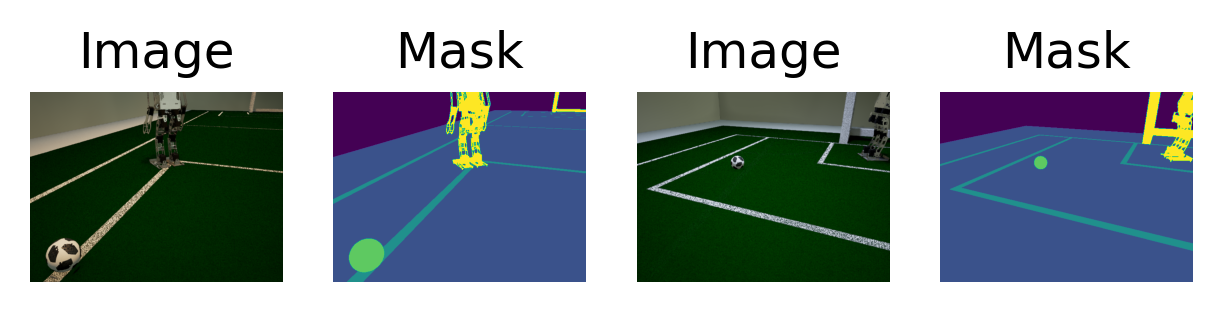

In [5]:
# # Train set
# for X,Y in train_generator:
#   plt.figure(figsize=(12,18), dpi=300)
#   for ii in range(2):
#     plt.subplot(1,4,ii*2+1)
#     plt.imshow(X[ii]/X[ii].max())
#     plt.axis("off")
#     plt.title("Image")
#     plt.subplot(1,4,ii*2+2)
#     mask = np.argmax(Y[ii], axis=-1)
#     mask = np.expand_dims(mask, axis=-1)
#     plt.imshow(mask/mask.max())
#     plt.axis("off")
#     plt.title("Mask")
#   plt.show()
#   break

# # Validation set
# for X,Y in validation_generator:
#   plt.figure(figsize=(12, 18), dpi=300)
#   for ii in range(2):
#     plt.subplot(1,4,ii*2+1)
#     plt.imshow(X[ii]/X[ii].max())
#     plt.axis("off")
#     plt.title("Image")
#     plt.subplot(1,4,ii*2+2)
#     mask = helpers.categorical_to_image(Y[ii])
#     plt.imshow(mask/mask.max())
#     plt.axis("off")
#     plt.title("Mask")
#   plt.show()
#   break



plt.figure(figsize=(5, 10), dpi=300)

for i in range(2):
    img = plt.imread(input_paths[i])
    plt.subplot(1, 4, i*2+1)
    plt.imshow(img/img.max())
    plt.axis('off')
    plt.title('Image')
    plt.subplot(1, 4, i*2+2)
    mask = plt.imread(target_paths[i])
    plt.imshow(mask/mask.max())
    plt.axis('off')
    plt.title('Mask')
plt.show()

## Create helper to iterate over the data

In [6]:
class DataSequence(tf.keras.utils.Sequence):
    '''Helper to iterate over the data as Numpy arrays.'''

    def __init__(self, input_paths, target_paths, batch_size=BATCH_SIZE, img_size=IMG_SIZE, n_channels=N_CHANNELS, n_classes=num_classes):
        self.input_paths = input_paths
        self.target_paths = target_paths
        self.batch_size = batch_size
        self.img_size = img_size
        self.n_channels = n_channels
        self.n_classes = n_classes

    def __len__(self):
        return len(target_paths) // self.batch_size

    def __getitem__(self, idx):
        '''Returns tuple (input, target) correspond to batch #idx.'''
        i = idx * self.batch_size
        batch_input_paths = self.input_paths[i: i + self.batch_size]
        batch_target_paths = self.target_paths[i: i + self.batch_size]
        x = np.zeros((self.batch_size, ) + self.img_size + (self.n_channels, ), dtype='float32')
        for j, path in enumerate(batch_input_paths):
            img = plt.imread(path)
            if img.max() > 1:
                img = img/img.max()
            x[j] = img
        y = np.zeros((self.batch_size, ) + self.img_size + (self.n_classes, ), dtype='uint8')
        for j, path in enumerate(batch_target_paths):
            mask = plt.imread(path)
            mask = tf.keras.utils.to_categorical(mask, self.n_classes)
            y[j] = mask
        return x, y


## Split data into train / validation / test

In [7]:
# Split our img paths into a training and a validation set
val_samples = int(0.15 * len(input_paths))
train_samples = len(input_paths) - val_samples

train_input_paths = input_paths[:train_samples]
train_target_paths = target_paths[:train_samples]

val_input_paths = input_paths[train_samples:train_samples + val_samples]
val_target_paths = target_paths[train_samples:train_samples + val_samples]

# Instantiate data Sequences for each split
train_gen = DataSequence(train_input_paths, train_target_paths)
val_gen = DataSequence(val_input_paths, val_target_paths)
test_gen = DataSequence(test_input_paths, test_target_paths)

## Define the model

In [8]:
def get_unet_mod(num_classes=num_classes, img_size=IMG_SIZE, learning_rate=1e-3, \
                learning_decay=1e-6, drop_out=0.1, nchannels=N_CHANNELS, kshape=(3, 3)):
    '''Get U-Net model with gaussian noise and dropout'''
    
    inputs = tf.keras.Input(shape=img_size + (nchannels, ))

    x = inputs
    # downstack
    x = tf.keras.layers.Conv2D(32, (3, 3), padding='same', activation='relu')(x)
    conv1 = tf.keras.layers.Conv2D(32, (3, 3), padding='same', activation='relu')(x)
    x = tf.keras.layers.MaxPooling2D((2, 2))(conv1)
    x = tf.keras.layers.Conv2D(64, (3, 3), padding='same', activation='relu')(x)
    conv2 = tf.keras.layers.Conv2D(64, (3, 3), padding='same', activation='relu')(x)
    x = tf.keras.layers.MaxPooling2D((2, 2))(conv2)
    x = tf.keras.layers.Conv2D(128, (3, 3), padding='same', activation='relu')(x)
    conv3 = tf.keras.layers.Conv2D(128, (3, 3), padding='same', activation='relu')(x)
    x = tf.keras.layers.MaxPooling2D((2, 2))(conv3)
    x = tf.keras.layers.Conv2D(256, (3, 3), padding='same', activation='relu')(x)
    conv4 = tf.keras.layers.Conv2D(256, (3, 3), padding='same', activation='relu')(x)
    x = tf.keras.layers.MaxPooling2D((2, 2))(conv4)

    x = tf.keras.layers.Conv2D(512, (3, 3), padding='same', activation='relu')(x)
    x = tf.keras.layers.Conv2D(512, (3, 3), padding='same', activation='relu')(x)

    # upstack
    x = tf.keras.layers.UpSampling2D((2, 2))(x)
    x = tf.keras.layers.Concatenate()([conv4, x])
    x = tf.keras.layers.Conv2DTranspose(256, (3, 3), padding='same', activation='relu')(x)
    x = tf.keras.layers.Conv2DTranspose(256, (3, 3), padding='same', activation='relu')(x)
    x = tf.keras.layers.UpSampling2D((2, 2))(x)
    x = tf.keras.layers.Concatenate()([conv3, x])
    x = tf.keras.layers.Conv2DTranspose(128, (3, 3), padding='same', activation='relu')(x)
    x = tf.keras.layers.Conv2DTranspose(128, (3, 3), padding='same', activation='relu')(x)
    x = tf.keras.layers.UpSampling2D((2, 2))(x)
    x = tf.keras.layers.Concatenate()([conv2, x])
    x = tf.keras.layers.Conv2DTranspose(64, (3, 3), padding='same', activation='relu')(x)
    x = tf.keras.layers.Conv2DTranspose(64, (3, 3), padding='same', activation='relu')(x)
    x = tf.keras.layers.UpSampling2D((2, 2))(x)
    x = tf.keras.layers.Concatenate()([conv1, x])
    x = tf.keras.layers.Conv2DTranspose(32, (3, 3), padding='same', activation='relu')(x)
    x = tf.keras.layers.Conv2DTranspose(32, (3, 3), padding='same', activation='relu')(x)
    x = tf.keras.layers.Conv2DTranspose(num_classes, (1, 1), activation='softmax')(x)

    model = tf.keras.Model(inputs, outputs=x)


    # ### [First half of the network: downsampling inputs] ###

    # # Entry block
    # x = tf.keras.layers.Conv2D(32, 3, strides=2, padding='same')(inputs)
    # x = tf.keras.layers.BatchNormalization()(x)
    # x = tf.keras.layers.Activation('relu')(x)

    # previous_block_activation = x  # Set aside residual

    # # Blocks 1, 2, 3 are identical apart from the feature depth.
    # for filters in [64, 128, 256]:
    #     x = tf.keras.layers.Activation('relu')(x)
    #     x = tf.keras.layers.SeparableConv2D(filters, 3, padding='same')(x)
    #     x = tf.keras.layers.BatchNormalization()(x)

    #     x = tf.keras.layers.Activation('relu')(x)
    #     x = tf.keras.layers.SeparableConv2D(filters, 3, padding='same')(x)
    #     x = tf.keras.layers.BatchNormalization()(x)

    #     x = tf.keras.layers.MaxPooling2D(3, strides=2, padding='same')(x)

    #     # Project residual
    #     residual = tf.keras.layers.Conv2D(filters, 1, strides=2, padding='same')(
    #         previous_block_activation
    #     )
    #     x = tf.keras.layers.add([x, residual])  # Add back residual
    #     previous_block_activation = x  # Set aside next residual

    # ### [Second half of the network: upsampling inputs] ###

    # for filters in [256, 128, 64, 32]:
    #     x = tf.keras.layers.Activation('relu')(x)
    #     x = tf.keras.layers.Conv2DTranspose(filters, 3, padding='same')(x)
    #     x = tf.keras.layers.BatchNormalization()(x)

    #     x = tf.keras.layers.Activation('relu')(x)
    #     x = tf.keras.layers.Conv2DTranspose(filters, 3, padding='same')(x)
    #     x = tf.keras.layers.BatchNormalization()(x)

    #     x = tf.keras.layers.UpSampling2D(2)(x)

    #     # Project residual
    #     residual = tf.keras.layers.UpSampling2D(2)(previous_block_activation)
    #     residual = tf.keras.layers.Conv2D(filters, 1, padding='same')(residual)
    #     x = tf.keras.layers.add([x, residual])  # Add back residual
    #     previous_block_activation = x  # Set aside next residual

    # # Add a per-pixel classification layer
    # outputs = tf.keras.layers.Conv2D(num_classes, 1, activation='softmax', padding='same')(x)

    # # Define the model
    # model = tf.keras.Model(inputs, outputs)
    opt = tf.keras.optimizers.Adam(lr= learning_rate, decay = learning_decay)
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

    return model

tf.keras.backend.clear_session()

# Build model
model = get_unet_mod(num_classes)
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 480, 640, 4) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 480, 640, 32) 1184        input_1[0][0]                    
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 480, 640, 32) 9248        conv2d[0][0]                     
__________________________________________________________________________________________________
max_pooling2d (MaxPooling2D)    (None, 240, 320, 32) 0           conv2d_1[0][0]                   
______________________________________________________________________________________________

## Define callbacks

In [9]:
model_name = 'unet_seg.h5'
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience = 20)

monitor = tf.keras.callbacks.ModelCheckpoint(model_name, monitor='val_loss',\
                                             verbose=0,save_best_only=True,\
                                             save_weights_only=True,\
                                             mode='min')
# Learning rate schedule
def scheduler(epoch, lr):
    if epoch%3 == 0 and epoch!= 0:
        lr = lr/2
    return lr

lr_schedule = tf.keras.callbacks.LearningRateScheduler(scheduler,verbose = 0)

callbacks = [early_stop, monitor, lr_schedule]

## Train the model

In [10]:
# Train the model, doing validation at the end of each epoch.
epochs = 1
model.fit(train_gen, epochs=epochs, validation_data=val_gen, callbacks=callbacks)

  58/1158 [>.............................] - ETA: 3:05:39 - loss: 0.6362 - accuracy: 0.9196

KeyboardInterrupt: 

## Extract metrics

In [ ]:
model.load_weights(model_name)
metrics = model.evaluate(test_gen)
print('Categorical cross-entropy:', metrics[0])
print('Accuracy:', metrics[1])

## Visualize test results

In [ ]:
test_preds = model.predict(tes_gen)

plt.figure(figsize=(12,18), dpi=300)
for i in range(1):
    img = plt.imread(test_input_paths[i])
    plt.subplot(2, 3, i*3+1)
    plt.imshow(img/img.max())
    plt.axis('off')
    plt.title('Image')
    plt.subplot(2, 3, i*3+2)
    predicted_mask = np.argmax(test_preds[i], axis=-1)
    predicted_mask = np.expand_dims(predicted_mask, axis=-1)
    plt.imshow(predicted_mask/predicted_mask.max(), cmap='gray')
    plt.axis('off')
    plt.title('Predicted Mask')
    plt.subplot(2, 3, i*3+3)
    actual_mask = np.loadtxt(test_target_paths[i])
    plt.imshow(actual_mask/actual_mask.max(), cmap='gray')
    plt.axis('off')
    plt.title('Actual Mask')
plt.show()